In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Install kaggle package if not already installed
!pip install kaggle

# Create directory for Kaggle API token
!mkdir -p ~/.kaggle

!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download yemregundogmus/turkey-political-opinions

# Unzip the downloaded file
!unzip turkey-political-opinions.zip

df = pd.read_csv('yonelimfinal.csv')
df.head()

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/yemregundogmus/turkey-political-opinions
License(s): copyright-authors
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 26.4MB/s]
Archive:  turkey-political-opinions.zip
  inflating: data.csv                
  inflating: datav2.csv              
  inflating: yonelimfinal.csv        


,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,5/11/2018 1:26:14,Erkek,18-30,Marmara,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
1,5/11/2018 1:28:11,Erkek,18-30,Marmara,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
2,5/11/2018 1:28:26,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
3,5/11/2018 1:30:18,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
4,5/11/2018 1:30:21,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Hayır,IYI PARTI


In [ ]:
df.drop(columns=['Timestamp'],axis=1 ,inplace=True)

In [ ]:
print("row number: " + str(df.shape[0]))
print("column number: " + str(df.shape[1]))

row number: 885
column number: 15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cinsiyet  885 non-null    object
 1   Yas       885 non-null    object
 2   Bolge     885 non-null    object
 3   Egitim    885 non-null    object
 4   soru1     885 non-null    object
 5   soru2     885 non-null    object
 6   soru3     885 non-null    object
 7   soru4     885 non-null    object
 8   soru5     885 non-null    object
 9   soru6     885 non-null    object
 10  soru7     885 non-null    object
 11  soru8     885 non-null    object
 12  soru9     885 non-null    object
 13  soru10    885 non-null    object
 14  parti     885 non-null    object
dtypes: object(15)
memory usage: 103.8+ KB


In [ ]:
for col in df.columns:
    print(df[col].value_counts(normalize=True) * 100)

Timestamp
5/22/2018 12:21:54    0.225989
5/22/2018 12:10:59    0.225989
5/22/2018 0:36:09     0.225989
5/22/2018 12:05:50    0.225989
5/22/2018 12:15:14    0.225989
                        ...   
5/21/2018 14:49:59    0.112994
5/21/2018 14:50:20    0.112994
5/21/2018 14:50:24    0.112994
5/21/2018 14:51:44    0.112994
5/27/2018 2:20:17     0.112994
Name: proportion, Length: 876, dtype: float64
Cinsiyet
Erkek    91.186441
Kadın     8.813559
Name: proportion, dtype: float64
Yas
0-18     43.954802
18-30    42.033898
30-50     9.604520
50-60     2.824859
60+       1.581921
Name: proportion, dtype: float64
Bolge
Marmara         49.378531
Ege             14.689266
İç Anadolu      13.107345
Akdeniz         11.412429
Karadeniz        7.005650
Güneydoğu        2.372881
Doğu Anadolu     2.033898
Name: proportion, dtype: float64
Egitim
Lise           60.112994
Lisans         23.615819
Ön Lisans       8.135593
Lisans Üstü     3.954802
Ortaokul        2.824859
İlkokul         1.355932
Name: proport

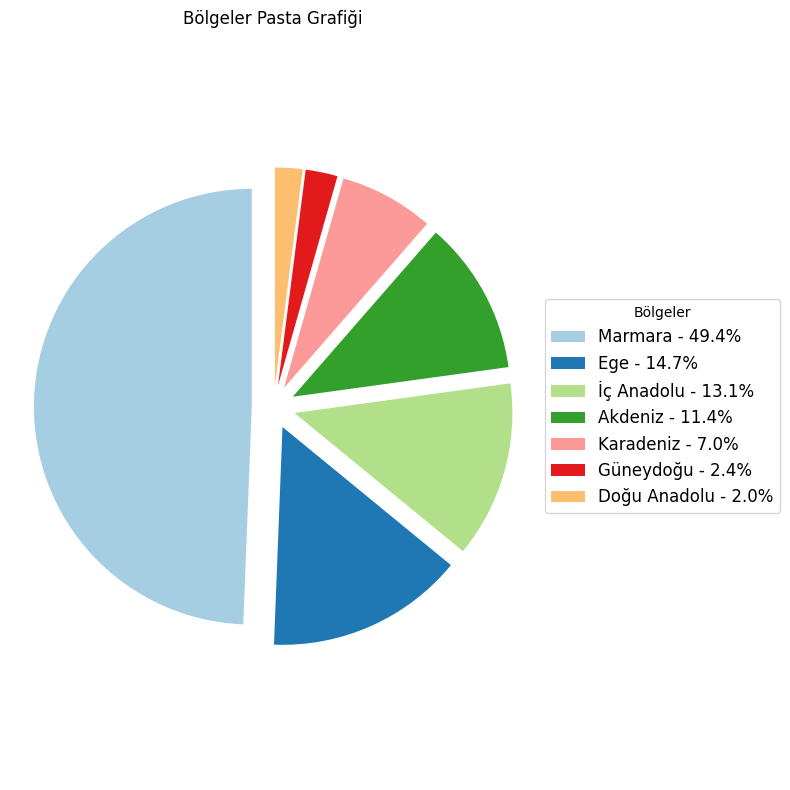

In [ ]:
# Create a count of each region
bolge_data = df['Bolge'].value_counts().reset_index()
bolge_data.columns = ['Bolge', 'Count']

# Calculate percentages for the legend
bolge_data['Percentage'] = (bolge_data['Count'] / bolge_data['Count'].sum()) * 100

# Create labels with percentages for the legend
legend_labels = [f"{row['Bolge']} - {row['Percentage']:.1f}%" for _, row in bolge_data.iterrows()]

# Plot the exploded pie chart
explode = [0.1] * len(bolge_data)  # Explode each slice
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(bolge_data['Count'], labels=None, startangle=90, explode=explode, colors=plt.cm.Paired.colors)

# Add legend on the right with labels and ratios
ax.legend(legend_labels, title="Bölgeler", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# Title and axis
plt.title("Bölgeler Pasta Grafiği")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the plot
plt.tight_layout()
plt.show()

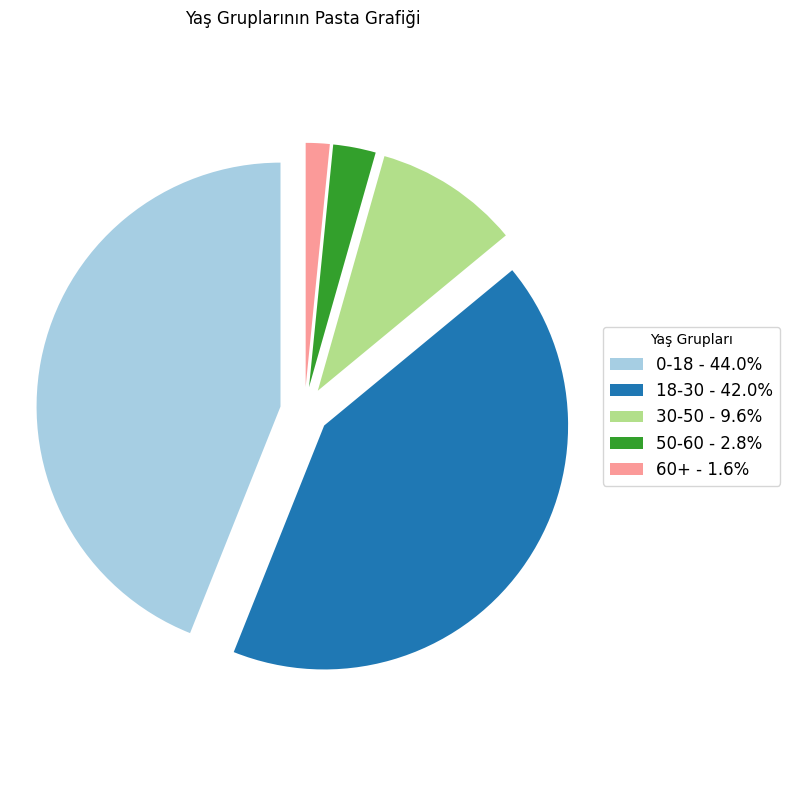

In [ ]:
age_data = df['Yas'].value_counts().reset_index()
age_data.columns = ['Age Group', 'Count']

age_data['Percentage'] = (age_data['Count'] / age_data['Count'].sum()) * 100

legend_labels = [f"{row['Age Group']} - {row['Percentage']:.1f}%" for _, row in age_data.iterrows()]


explode = [0.1] * len(age_data)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(age_data['Count'], labels=None, startangle=90, explode=explode, colors=plt.cm.Paired.colors)

ax.legend(legend_labels, title="Yaş Grupları", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.title("Yaş Gruplarının Pasta Grafiği")
plt.axis('equal')

plt.tight_layout()
plt.show()

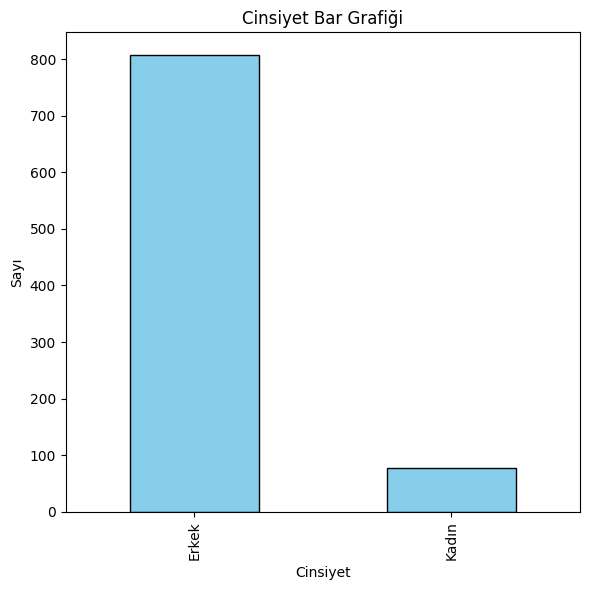

In [ ]:
plt.figure(figsize=(6, 6))
df['Cinsiyet'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Cinsiyet Bar Grafiği')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')

plt.tight_layout()
plt.show()

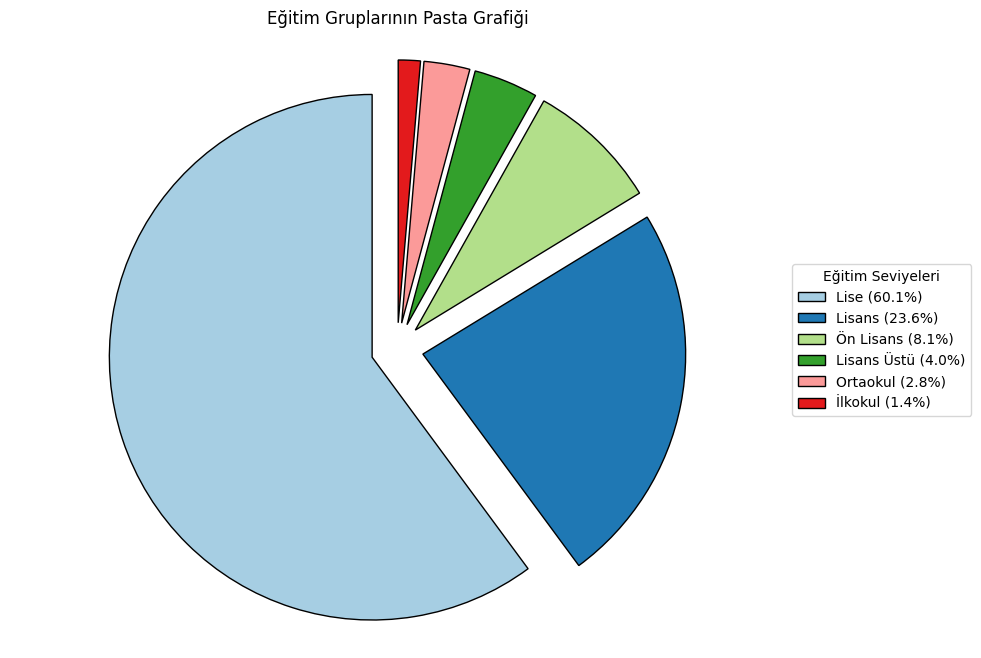

In [ ]:
egitim_data = df['Egitim'].value_counts().reset_index()
egitim_data.columns = ['Egitim', 'Count']

egitim_data['Percentage'] = (egitim_data['Count'] / egitim_data['Count'].sum()) * 100

explode = [0.1] * len(egitim_data)

fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(egitim_data['Count'], explode=explode, startangle=90,
       colors=plt.cm.Paired.colors, pctdistance=0.75, labeldistance=1.3, wedgeprops={'edgecolor': 'black'},
       labels=[None] * len(egitim_data))

ax.set_title("Eğitim Gruplarının Pasta Grafiği")
ax.axis('equal')

legend_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(egitim_data['Egitim'], egitim_data['Percentage'])]

plt.legend(legend_labels, title="Eğitim Seviyeleri", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


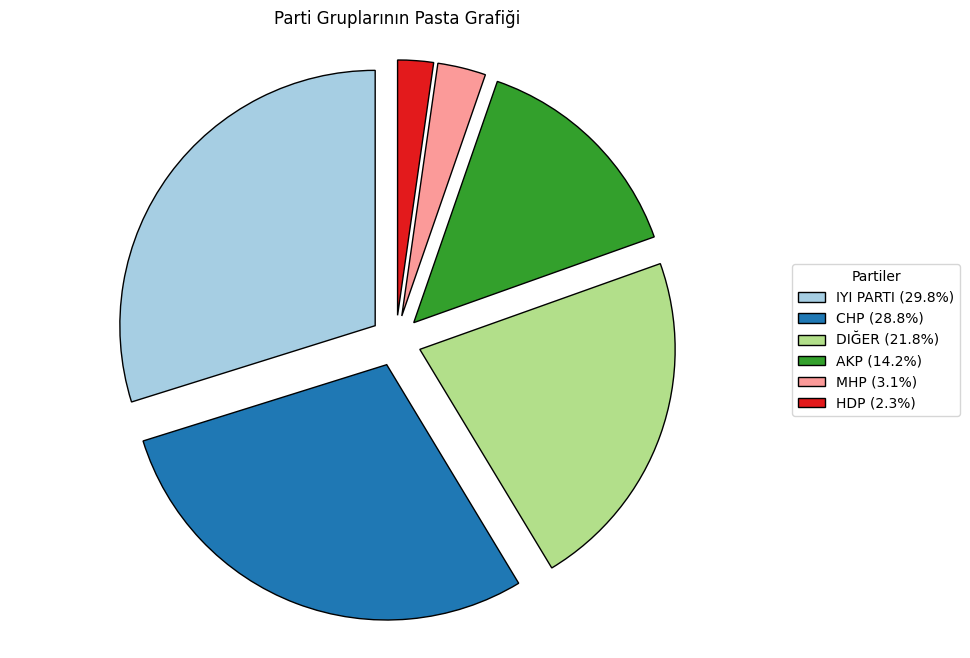

In [ ]:
parti_data = df['parti'].value_counts().reset_index()
parti_data.columns = ['parti', 'Count']

parti_data['Percentage'] = (parti_data['Count'] / parti_data['Count'].sum()) * 100

explode = [0.1] * len(parti_data)

fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(parti_data['Count'], explode=explode, startangle=90,
       colors=plt.cm.Paired.colors, pctdistance=0.75, labeldistance=1.3, wedgeprops={'edgecolor': 'black'},
       labels=[None] * len(parti_data))

ax.set_title("Parti Gruplarının Pasta Grafiği")
ax.axis('equal')

legend_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(parti_data['parti'], parti_data['Percentage'])]

plt.legend(legend_labels, title="Partiler", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
df["Egitim"].unique()

array(['Lisans', 'Lise', 'Ön Lisans', 'Lisans Üstü', 'İlkokul',
       'Ortaokul'], dtype=object)

In [ ]:
df["Yas"].unique()

array(['18-30', '0-18', '60+', '30-50', '50-60'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.replace(("Evet", "Hayır"), (1,0), inplace=True)

df["Bolge"] = le.fit_transform(df["Bolge"])

df["parti"] = df["parti"].map({"IYI PARTI": 0, "CHP": 1, "DIĞER": 2,
                               "AKP": 3, "MHP": 4, "HDP": 5})
df["Yas"] = df["Yas"].map({"0-18": 1, "18-30": 2, "30-50": 3, "50-60": 4, "60+": 5})
df["Cinsiyet"] = df["Cinsiyet"].map({"Erkek": 1, "Kadın": 0})
df["Egitim"] = df["Egitim"].map({"İlkokul": 1, "Ortaokul": 2, "Lise": 3,
                                 "Ön Lisans": 4, "Lisans": 5, "Lisans Üstü": 6})

In [ ]:
df.head()

,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
0,1,2,5,5,0,1,1,0,0,0,1,0,1,1,0
1,1,2,5,5,1,1,0,1,0,1,0,1,0,0,3
2,0,2,5,5,0,1,0,0,0,0,1,0,1,1,2
3,1,1,5,3,1,1,0,1,0,1,1,1,1,1,0
4,1,2,5,4,0,1,1,1,0,0,1,1,0,0,0


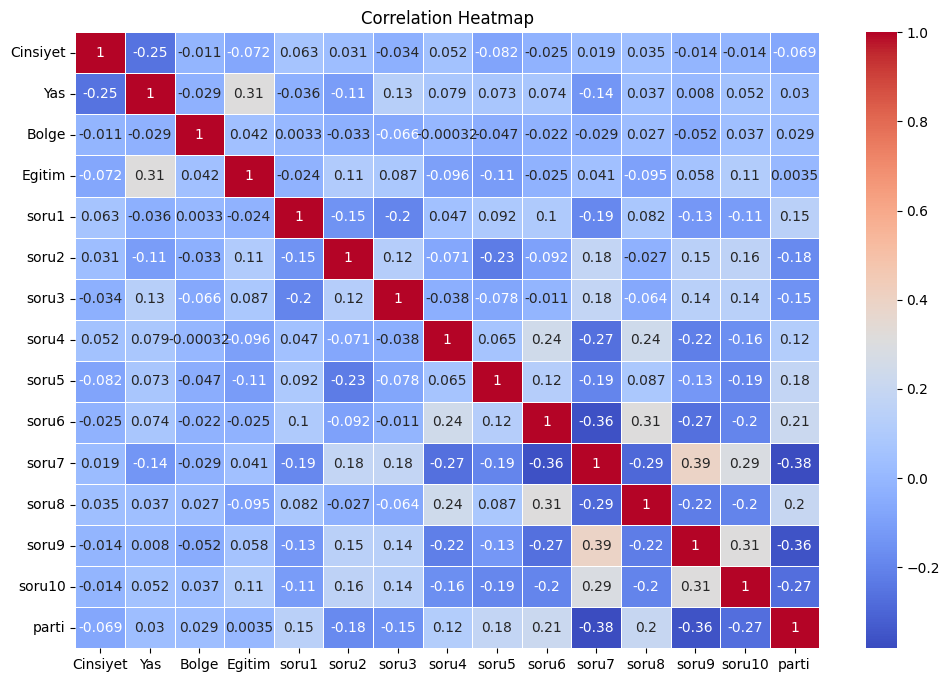

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

corr_matrix = numerical_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop('parti', axis=1)
y = df['parti']

In [ ]:
y.value_counts()

,count
parti,
0,264
1,255
2,193
3,126
4,27
5,20


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, shuffle=True, stratify=y)

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTEN

smote = SMOTEN(random_state=42)

X_smote, y_smote = smote.fit_resample(X_train, y_train)


X_train = X_smote
y_train = y_smote

y_train.value_counts()

,count
parti,
2,211
0,211
1,211
5,211
3,211
4,211


In [ ]:
X_train.shape

(1266, 14)

In [ ]:
y_train.shape

(1266,)

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

svm_model = GridSearchCV(SVC(gamma= "auto"), {
    "kernel": ["linear", "rbf"],
    "C": [0.1 ,1, 5, 10, 20]
}, cv=5, return_train_score=False)

svm_model.fit(X_train, y_train)
print(svm_model.best_params_)

{'C': 20, 'kernel': 'rbf'}


In [ ]:
rbf_model = GridSearchCV(RandomForestClassifier(random_state=42), {
    "n_estimators": [5, 10, 15, 20, 30, 50]
})

rbf_model.fit(X_train, y_train)
print(rbf_model.best_params_)

{'n_estimators': 50}


In [ ]:
svm = SVC(gamma= "auto", kernel= "rbf", C= 20, probability=True)
rf = RandomForestClassifier(n_estimators=50, random_state=42)

svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

print(svm.score(X_test, y_test))
print(rf.score(X_test, y_test))

0.4124293785310734
0.4011299435028249


In [ ]:
y_new = pd.concat([y_train, y_test])
X_new = pd.concat([X_train, X_test])

In [ ]:
svm_score = cross_val_score(svm, X_new, y_new, cv=kf)
rf_score = cross_val_score(rf, X_new, y_new, cv=kf)

print("SVM Classifier cross-validation score:", svm_score, "\n"
      "SVM Classifier mean cross-validation score:", svm_score.mean())
print("Random Forest Classifier cross-validation score:", rf_score, "\n"
      "Random Forest Classifier mean cross-validation score:", rf_score.mean())

SVM Classifier cross-validation score: [0.60207612 0.56401384 0.61245675 0.57291667 0.61458333] 
SVM Classifier mean cross-validation score: 0.5932093425605536
Random Forest Classifier cross-validation score: [0.60553633 0.58131488 0.6366782  0.60069444 0.625     ] 
Random Forest Classifier mean cross-validation score: 0.60984477124183


In [ ]:
X_train.shape

(1266, 14)

In [ ]:
!pip uninstall -y scikit-learn
!pip install --upgrade scikit-learn==1.3.2
!pip install scikeras

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.2 which is incompatible.


  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

model = tf.keras.Sequential([
    tf.keras.layers.Input((14,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax"),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292 (1.14 KB)

 Trainable params: 292 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1664 - loss: 1.9263 - val_accuracy: 0.1299 - val_loss: 1.8301
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3129 - loss: 1.7386 - val_accuracy: 0.1638 - val_loss: 1.8076
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3391 - loss: 1.7280 - val_accuracy: 0.1695 - val_loss: 1.7943
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3579 - loss: 1.7096 - val_accuracy: 0.1695 - val_loss: 1.7928
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3896 - loss: 1.6689 - val_accuracy: 0.1751 - val_loss: 1.7911
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3877 - loss: 1.6521 - val_accuracy: 0.1638 - val_loss: 1.7894
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3621 - loss: 1.6298 - val_accuracy: 0.1582 - val_loss: 1.7899
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3964 - loss: 1.5948 - val_accuracy: 0.1864 - val_los

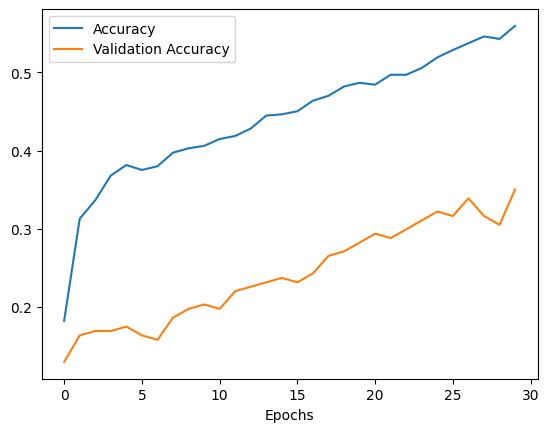

In [ ]:
plt.plot(history.epoch, history.history["accuracy"], label="Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
def build_model(learning_rate=0.001, num_hidden_layers=1, num_units=64, epochs=10):
    model = Sequential()
    model.add(Dense(num_units, input_dim=14, activation='relu'))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_units, activation='relu'))

    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_hidden_layers': [1, 2],
    'num_units': [8, 16],
    'epochs': [20]
}

keras_clf = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, learning_rate=0.001, num_units=32, num_hidden_layers=1, verbose=0)
grid_search = GridSearchCV(estimator=keras_clf, param_grid=param_grid, n_jobs=1, cv=3)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'epochs': 20, 'learning_rate': 0.01, 'num_hidden_layers': 2, 'num_units': 16}
Best Score: 0.598736176935229


In [ ]:
best_model = build_model(num_hidden_layers=2, num_units=32)
best_history = best_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2398 - loss: 1.7719 - val_accuracy: 0.1864 - val_loss: 1.8200
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3973 - loss: 1.6431 - val_accuracy: 0.1921 - val_loss: 1.7360
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4461 - loss: 1.5237 - val_accuracy: 0.2542 - val_loss: 1.6272
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4620 - loss: 1.4628 - val_accuracy: 0.2316 - val_loss: 1.6172
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4746 - loss: 1.3633 - val_accuracy: 0.2768 - val_loss: 1.5621
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4789 - loss: 1.3408 - val_accuracy: 0.2599 - val_loss: 1.5831
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 1.2709 - val_accuracy: 0.2542 - val_loss: 1.5773
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4866 - loss: 1.2613 - val_accuracy: 0.2881 - val_loss

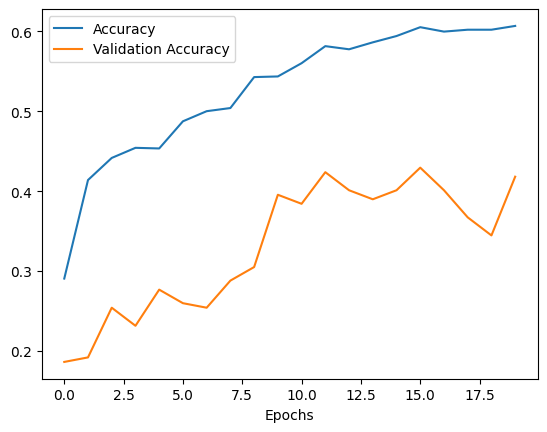

In [ ]:
plt.plot(best_history.epoch, best_history.history["accuracy"], label="Accuracy")
plt.plot(best_history.epoch, best_history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.51      0.47        53
           1       0.46      0.43      0.44        51
           2       0.27      0.23      0.25        39
           3       0.64      0.56      0.60        25
           4       0.00      0.00      0.00         5
           5       0.25      0.25      0.25         4

    accuracy                           0.41       177
   macro avg       0.34      0.33      0.34       177
weighted avg       0.42      0.41      0.41       177

              precision    recall  f1-score   support

           0       0.45      0.43      0.44        53
           1       0.43      0.39      0.41        51
           2       0.31      0.36      0.33        39
           3       0.61      0.56      0.58        25
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4

    accuracy                           0.40       177
   macro avg       0.30

In [ ]:
#KNN ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 101)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)

print(grid_knn.best_params_)

{'n_neighbors': 22}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))

Accuracy (KNN): 0.384180790960452
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.48      0.43      0.46        53
           1       0.43      0.49      0.46        51
           2       0.29      0.18      0.22        39
           3       0.63      0.48      0.55        25
           4       0.04      0.20      0.07         5
           5       0.00      0.00      0.00         4

    accuracy                           0.38       177
   macro avg       0.31      0.30      0.29       177
weighted avg       0.42      0.38      0.40       177



In [ ]:
#Cross-validation for KNN
from sklearn.model_selection import cross_val_score
knn_cv_scores = cross_val_score(knn, X_new, y_new, cv=5)
print("Cross-Validation Accuracy (KNN):", knn_cv_scores.mean())

Cross-Validation Accuracy (KNN): 0.5475201845444061


In [ ]:
#LOGISTIC ALGORITHM
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

NameError: name 'X_train' is not defined

In [ ]:
log_reg = LogisticRegression(C=100,multi_class='multinomial', solver='newton-cg',max_iter=1000, random_state=42)

In [ ]:
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))

Accuracy (Logistic Regression): 0.4124293785310734
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.61      0.36      0.45        53
           1       0.46      0.43      0.44        51
           2       0.41      0.28      0.33        39
           3       0.66      0.76      0.70        25
           4       0.00      0.00      0.00         5
           5       0.11      0.50      0.18         4

    accuracy                           0.41       177
   macro avg       0.37      0.39      0.35       177
weighted avg       0.50      0.41      0.44       177



In [ ]:
log_reg_cv_scores = cross_val_score(log_reg, X_new, y_new, cv=5)
print("Cross-Validation Accuracy (Logistic Regression):", log_reg_cv_scores.mean())

Cross-Validation Accuracy (Logistic Regression): 0.5516580161476355


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,y_train)

print("The accuracy of the model on validation set is", adb_model.score(X_test,y_test))

The accuracy of the model on validation set is 0.3333333333333333


In [ ]:
#!pip install --upgrade scikit-learn==1.3.2
!pip install --upgrade xgboost==2.0.2

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

xgb_score = cross_val_score(xgb_model, X_new, y_new, cv=kf)

xgb_model.fit(X_train, y_train)
print("XGBoost score:",xgb_model.score(X_test, y_test))

print("XGBoost cross-validation score:", xgb_score, "\n"
      "XGBoost mean cross-validation score:", xgb_score.mean())

XGBoost score: 0.4011299435028249
XGBoost cross-validation score: [0.59515571 0.61245675 0.62975779 0.59375    0.625     ] 
XGBoost mean cross-validation score: 0.6112240484429066


In [ ]:
import lightgbm as lgb

params = {
    'objective': 'multiclass',
    'num_class': 6,
    'metric': 'multi_logloss',
    'boosting_type': 'gbrt',
    'num_leaves': 31,
    'learning_rate': 0.06,
    'num_iterations' : 100,
}

clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("The accuracy of the model on the validation set is", clf.score(X_test, y_test))
print(classification_report(y_test, predictions))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 1266, number of used features: 14
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
The accuracy of the model 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier


lgb_model = lgb.LGBMClassifier(**params, n_estimators=100, random_state= 42)
adb_model = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

log_model = LogisticRegression(class_weight='balanced')

estimators = [
    ("LightGBM", lgb_model),
    ("AdaBoost", adb_model),
    ("XGBoost", xgb_model)
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=log_model,
    n_jobs= 1
)

stack_model = stack.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)
print("The accuracy of the model on the validation set is", stack_model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 1266, number of used features: 14
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-cho